<a href="https://colab.research.google.com/github/QuanRy/Machine_Learning/blob/main/lab_8/lab_8_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
#БИБЛИОТЕКИ
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import matplotlib as mpl
import pandas as pd
import numpy as np
import sklearn
import time
import sys
import os



In [145]:
# Загрузка данных
df = pd.read_csv("loan3000.csv", delimiter = ',')

In [146]:
df.head()

,Unnamed: 0,outcome,purpose_,dti,borrower_score,payment_inc_ratio
0,32109,paid off,debt_consolidation,21.23,0.40,5.11135
1,16982,default,credit_card,15.49,0.40,5.43165
2,25335,paid off,debt_consolidation,27.30,0.70,9.23003
3,34580,paid off,major_purchase,21.11,0.40,2.33482
4,14424,default,debt_consolidation,16.46,0.45,12.10320


In [147]:
print(df.shape) 

(3000, 6)


In [148]:
# Удаление столбца id
df.drop(columns=['Unnamed: 0',	'purpose_'], inplace=True)

# Замена значений столбца sex
df['outcome'].replace({'paid off': 0, 'default' : 1}, inplace = True)

df.head()

,outcome,dti,borrower_score,payment_inc_ratio
0,0,21.23,0.40,5.11135
1,1,15.49,0.40,5.43165
2,0,27.30,0.70,9.23003
3,0,21.11,0.40,2.33482
4,1,16.46,0.45,12.10320


In [162]:
#ВЫБОРКИ ДЛЯ МОДЕЛИ
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [163]:
#КОДИРОВАНИЕ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ
ct = ColumnTransformer([('encoder', OneHotEncoder(), [0, 2])], remainder='passthrough')
X = ct.fit_transform(X)

In [164]:
#МАСШТАБИРОВАНИЕ ДАННЫХ
scaler = StandardScaler(with_mean=False)
X = scaler.fit_transform(X)


#РАЗДЕЛЕНИЕ ДАННЫХ НА ТРЕНИРОВОЧНЫЙ И ТЕСТОВЫЙ НАБОРЫ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
     

In [165]:
#СОЗДАНИЕ МОДЕЛИ
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=16, activation='relu', input_shape=[X.shape[1]]),
    tf.keras.layers.Dense(units=8, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [166]:
#КОМПИЛЯЦИЯ МОДЕЛИ
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [167]:
#ОБУЧЕНИЕ МОДЕЛИ

X_train = X_train.toarray()
X_test = X_test.toarray()
#y_train = y_train.toarray()

model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
75/75 [==============================] - 2s 7ms/step - loss: -9.9369 - accuracy: 0.0000e+00 - val_loss: -24.9923 - val_accuracy: 0.0000e+00
Epoch 2/50
75/75 [==============================] - 0s 3ms/step - loss: -54.5001 - accuracy: 0.0000e+00 - val_loss: -107.0924 - val_accuracy: 0.0000e+00
Epoch 3/50
75/75 [==============================] - 0s 3ms/step - loss: -193.2175 - accuracy: 0.0000e+00 - val_loss: -334.2691 - val_accuracy: 0.0000e+00
Epoch 4/50
75/75 [==============================] - 0s 3ms/step - loss: -513.4808 - accuracy: 0.0000e+00 - val_loss: -792.8285 - val_accuracy: 0.0000e+00
Epoch 5/50
75/75 [==============================] - 0s 3ms/step - loss: -1093.6667 - accuracy: 0.0000e+00 - val_loss: -1550.3101 - val_accuracy: 0.0000e+00
Epoch 6/50
75/75 [==============================] - 0s 3ms/step - loss: -1997.6521 - accuracy: 0.0000e+00 - val_loss: -2678.0828 - val_accuracy: 0.0000e+00
Epoch 7/50
75/75 [==============================] - 0s 3ms/step - loss: -328

In [168]:
#ОЦЕНКА МОДЕЛИ НА ТЕСТОВОМ НАБОРЕ ДАННЫХ
_, accuracy = model.evaluate(X_test, y_test)
print('Качество(точность): %.4f' % (accuracy*100))

19/19 [==============================] - 0s 2ms/step - loss: -1148179.7500 - accuracy: 0.0000e+00
Качество(точность): 0.0000


In [169]:
#ПРИМЕР ИСПОЛЬЗОВАНИЯ МОДЕЛИ ДЛЯ ПРЕДСКАЗАНИЯ КЛАССА
test_sample = np.array([0, 21.23,	0.40]).reshape(1, -1)
test_sample = ct.transform(test_sample) # преобразование категориальных признаков
test_sample = scaler.transform(test_sample) # масштабирование

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [170]:
predicted_class = model.predict(test_sample)[0][0]

1/1 [==============================] - 0s 155ms/step


In [171]:
#ВЕРОЯТНОСТЬ ПРИНАДЛЕЖНОСТИ К КЛАССУ 1
print('Predicted class probability:', predicted_class)

Predicted class probability: 1.0


In [172]:
#ОКРУГЛЕНИЕ ВЕРОЯТНОСТИ, ПРЕВРАЩЕНИЕ В ЦЕЛОЧИСЛЕННЫЙ КЛАСС
predicted_class = int(np.round(predicted_class))
print('Predicted class:', predicted_class)

Predicted class: 1


Epoch 1/50
75/75 [==============================] - 0s 4ms/step - loss: -1144691.8750 - accuracy: 0.0000e+00 - val_loss: -1207368.3750 - val_accuracy: 0.0000e+00
Epoch 2/50
75/75 [==============================] - 0s 2ms/step - loss: -1202952.3750 - accuracy: 0.0000e+00 - val_loss: -1267839.1250 - val_accuracy: 0.0000e+00
Epoch 3/50
75/75 [==============================] - 0s 3ms/step - loss: -1262725.0000 - accuracy: 0.0000e+00 - val_loss: -1330467.7500 - val_accuracy: 0.0000e+00
Epoch 4/50
75/75 [==============================] - 0s 3ms/step - loss: -1324256.6250 - accuracy: 0.0000e+00 - val_loss: -1394324.7500 - val_accuracy: 0.0000e+00
Epoch 5/50
75/75 [==============================] - 0s 3ms/step - loss: -1387281.7500 - accuracy: 0.0000e+00 - val_loss: -1460403.2500 - val_accuracy: 0.0000e+00
Epoch 6/50
75/75 [==============================] - 0s 3ms/step - loss: -1452148.7500 - accuracy: 0.0000e+00 - val_loss: -1527576.7500 - val_accuracy: 0.0000e+00
Epoch 7/50
75/75 [==========

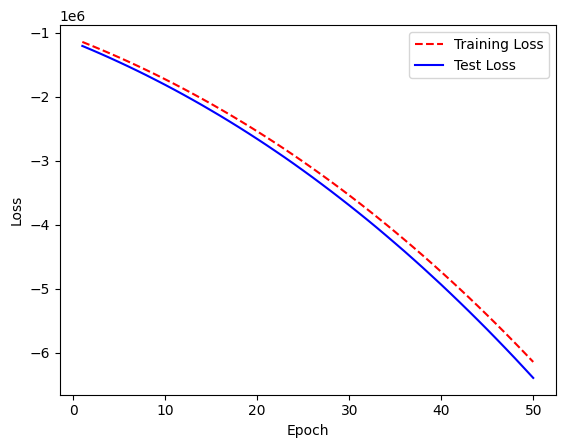

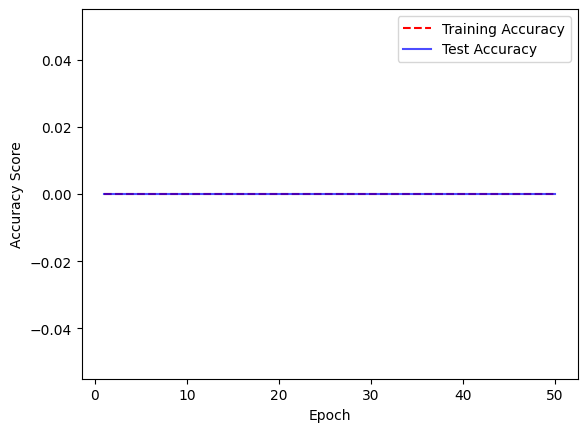

In [173]:
# График точности и функции потерь
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))
training_loss = history.history['loss']
test_loss = history.history['val_loss']
epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

training_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, test_acc, 'b-', alpha=0.7)
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy Score')
plt.show()